### Contrôle Continu - LU2PY222 : Modélisation Numérique en Physique
#### 5 mars 2025, 10h45 - 12h45

Vous rendrez sur Moodle un **compte-rendu** sous la forme d'un calepin **Jupyter** comprenant :
- vos codes python (bien commentés)
- vos graphiques (axes nommés et courbes légendées lorsque c'est nécessaire)
- les commentaires des résultats sous format Markdown lorsque c'est demandé

Vous avez le droit d'accéder à tous les calepins jupyter présents sur votre Hub, ainsi qu'à vos notes (manuscrites ou numériques) prises pendant les séances de travail de cette UE. L'accès à internet est limité aux sites de documentation **python**, **numpy** et **matplotlib**, et à Moodle. Vos documents numériques doivent être présents dans vos fichiers personnels Moodle. Les clés USB, smartphones et tablettes ne sont pas acceptées.

# Particule dans un cyclotron

Un cyclotron comporte trois parties, voir la figure ci-dessous. Les parties supérieure et inférieure, appelées "D" à cause de la forme de la trajectoire, sont plongées dans un champ magnétique.

![](Figure3.png)

Au temps $t_0=0$ **(ici le temps est sans unité)**, un proton est injecté au niveau du D inférieur sans vitesse. Une tension alternative est appliquée entre les D. Elle crée un champ électrique dont la direction et le sens sont toujours **similaires** à ceux de la vitesse du proton lorsqu’il est entre les D. Les instants $t_n$ où le proton sort des D (soit inférieur, soit supérieur, voir la figure) sont donnés, **sans unité**, par
$$t_n=n+\tau \sqrt{n}.$$
On choisit $\tau=0.5$. Le temps passé par le proton dans un D (supérieur ou inférieur) est toujours de $1$.
La trajectoire du proton est plane. On s’intéresse à sa vitesse. Ses composantes sont données, dans un repère et des unités appropriés, **en fonction de sa position dans le cyclotron:**
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$

Dans ces expressions, $\epsilon_n$ vaut $1$ pour $n$ pair et $-1$ pour $n$ impair. On pourra prendre $\epsilon_n = (-1)^n$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [7]:
tau = 0.5

def epsilon_n(n):
    return (-1)**n

## Partie I

1. Créer un tableau contenant les instants de sortie des boucles "D" : $t_0$, $t_1$, ... jusqu'à $t_{50}$ inclus. 

In [47]:
t_list = np.zeros(51)
t_list[0] = 0
for i in range(1, len(t_list)):
    t_list[i] = i + tau * np.sqrt(i)

In [48]:
t_list

array([ 0.        ,  1.5       ,  2.70710678,  3.8660254 ,  5.        ,
        6.11803399,  7.22474487,  8.32287566,  9.41421356, 10.5       ,
       11.58113883, 12.6583124 , 13.73205081, 14.80277564, 15.87082869,
       16.93649167, 18.        , 19.06155281, 20.12132034, 21.17944947,
       22.23606798, 23.29128785, 24.34520788, 25.39791576, 26.44948974,
       27.5       , 28.54950976, 29.59807621, 30.64575131, 31.6925824 ,
       32.73861279, 33.78388218, 34.82842712, 35.87228132, 36.91547595,
       37.95803989, 39.        , 40.04138127, 41.082207  , 42.122499  ,
       43.16227766, 44.20156212, 45.24037035, 46.27871926, 47.31662479,
       48.35410197, 49.39116499, 50.4278273 , 51.46410162, 52.5       ,
       53.53553391])

2. Vérifier que $t_1=1.5$, $t_4=5$, $t_9=10.5$, $t_{16}=18$, et $t_{25}=27.5$ avec des opérateurs booléens.

In [5]:
if t_list[1] == 1.5 and t_list[4] == 5 and t_list[9] == 10.5 and t_list[16] == 18 and t_list[25] == 27.5:
    print("On a bien t1 = 1.5, t4 = 5, t9=10.5, t16=18, t25=27.5")
else:
    print("Valeurs non exacte, merci de vérifié t_list")
    print(t_list)

On a bien t1 = 1.5, t4 = 5, t9=10.5, t16=18, t25=27.5


3. Calculer les valeurs de $v_x$ et $v_y$ en fonction du temps pour $t$ variant de $t_2−1$ à $t_2$. Vous utiliserez un échantillonage suffisant pour le temps $t$, dans un tableau distinct de celui de la question précédente. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. 

On va utiliser ici l'équation:
2) Pour $t$ variant de $t_{n+1}-1$ à $t_{n+1}$ c’est-à-dire quand il est dans D supérieur ou D inférieur.
$$
v_x(t) = \epsilon_n \sqrt{n+1} \sin \left( \pi (t-t_{n+1}) \right) \qquad v_y(t) = -\epsilon_n \sqrt{n+1} \cos \left( \pi (t-t_{n+1}) \right)
$$
En changeant les indices on a pour $t$ variant de $t_{n}-1$ à $t_{n}$:
$$
v_x(t) = \epsilon_{n-1} \sqrt{n} \sin \left( \pi (t-t_{n}) \right) \qquad v_y(t) = -\epsilon_{n-1} \sqrt{n} \cos \left( \pi (t-t_{n}) \right)
$$

In [62]:
def calc_v_in_D(t, n, dt=0.005):
    """
    t: temps
    n: indice de temps
    dt: facteur de discrétisation (par défaut 0.005 pour avoir 200 valeur discréte)
    
    Calcule les valeurs de v_x et v_y pour t variant de t_(n) - 1 à t_(n)
    t_ech est le temps échantilloné entre t_n - 1 et t_n avec le facteur dt
    return: (t_ech, v_x, v_y) où t_ech, v_x et v_y sont des tableau de dimension (1/dt)
    """
    t_d = 1 # Temps passé dans chaque D est constant et vaut 1
    t_ech = np.arange(t[n] - t_d, t[n], dt)
    v_x = epsilon_n(n-1) * np.sqrt(n) * np.sin(pi*(t_ech-(t[n])))
    v_y = - epsilon_n(n-1) * np.sqrt(n) * np.cos(pi*(t_ech-(t[n])))
    return t_ech, v_x, v_y

In [63]:
v_2 = calc_v_in_D(t_list, 2)
v_4 = calc_v_in_D(t_list, 4)

4. Représenter dans un graphique $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $t_2-1$ a $t_2$. Faire de même pour $t$ variant de $t_4-1$ à $t_4$.

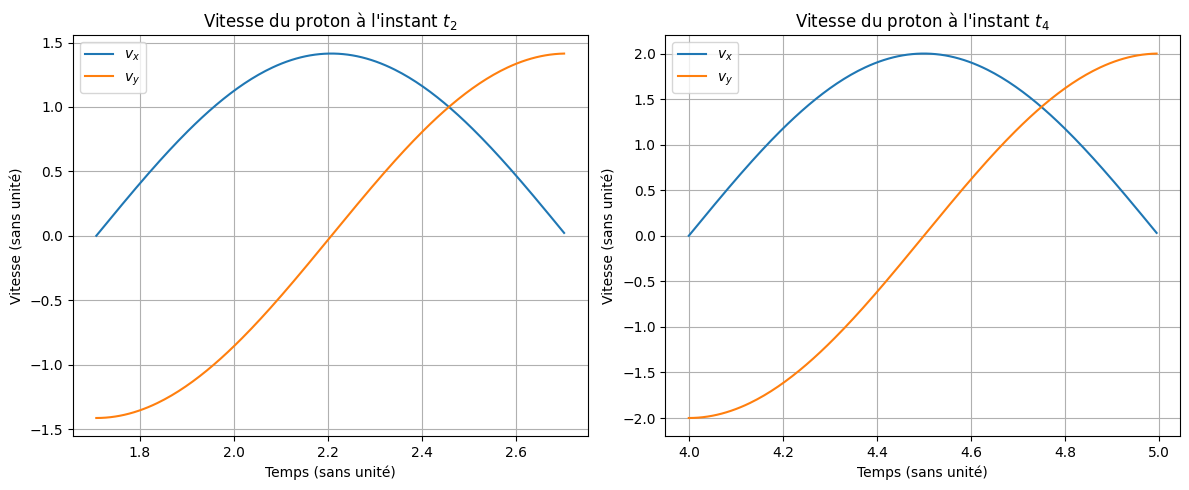

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(v_2[0], v_2[1], label=r"$v_x$")
plt.plot(v_2[0], v_2[2], label=r"$v_y$")
plt.xlabel("Temps (sans unité)")
plt.ylabel("Vitesse (sans unité)")
plt.title(r"Vitesse du proton à l'instant $t_2$")
plt.grid()
plt.legend()
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(v_4[0], v_4[1], label=r"$v_x$")
plt.plot(v_4[0], v_4[2], label=r"$v_y$")
plt.xlabel("Temps (sans unité)")
plt.ylabel("Vitesse (sans unité)")
plt.title(r"Vitesse du proton à l'instant $t_4$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

La vitesse suivant x pour t qui varient entre $t_2 - 1$ et $t_2$ est positive ce qui est attendu: C'est ce qu'on observe sur la figure. De même pour $t_4$
La vitesse suivant y pour t qui varient entre $t_2 - 1$ et $t_2$ est positive ce qui est attendu: En effet sur la figure on a bien d'abord la particule qui descend suivant l'axe des y puis qui remonte après avoir passé l'axe des ordonnées. De même pour $t_4$

5. Déterminer des valeurs approchées des maxima de $v_x$ et $v_y$ pour $t$ variant de $t_2-1$ à $t_2$, ainsi que les instants $t$ correspondants. Un maximum peut être en bord d'intervalle. Faire de même pour $t$ variant de $t_4-1$ à $t_4$. Commenter.

In [65]:
print(f"Maximum entre t_2 - 1 et t_2 de v_x = {np.max(v_2[1])} à l'instant t = {v_2[0][np.argmax(v_2[1])]}")
print(f"Maximum entre t_2 - 1 et t_2 de v_y = {np.max(v_2[2])} à l'instant t = {v_2[0][np.argmax(v_2[2])]}")
print()
print(f"Maximum entre t_4 - 1 et t_4 de v_x = {np.max(v_4[1])} à l'instant t = {v_4[0][np.argmax(v_4[1])]}")
print(f"Maximum entre t_4 - 1 et t_4 de v_y = {np.max(v_4[2])} à l'instant t = {v_4[0][np.argmax(v_4[2])]}")

Maximum entre t_2 - 1 et t_2 de v_x = 1.4142135623730951 à l'instant t = 2.207106781186537
Maximum entre t_2 - 1 et t_2 de v_y = 1.4140390943555021 à l'instant t = 2.7021067811865263

Maximum entre t_4 - 1 et t_4 de v_x = 2.0 à l'instant t = 4.499999999999989
Maximum entre t_4 - 1 et t_4 de v_y = 1.9997532649633196 à l'instant t = 4.994999999999979


On remarque que les vitesses maximals suivant $v_x$ et $v_y$ pour les 2 cas sont les mêmes ce qui est attendu car le proton ne subit qu'un champ magnétique dont le travail est toujours nul: la proton n'accélère pas pendant cette phase.
De plus $max(v_x) = max(v_y)$ sont décalé de 0.5 unité de temps. En effet à $t_n - 0.5$ correspond le moment où la vitesse suivant $y$ est nul, $v_x$ correspond à la norme de la vitesse, de même pour $v_y$ à $t_n$ (où $v_x$ est nul). De plus comme $\vec{v}$ est conservé on a bien $max(v_x) = max(v_y)$

## Partie II
6. Représenter $v_x$ et $v_y$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. On remarque que $v_x$ et $v_y$ sont des fonctions continues du temps $t$. Commenter.

Dans un premier temps il faut calculer la vitesse du proton dans le champ éléctrique en utilisant:
1) Pour $t$ variant de $t_n$ à $t_{n+1}-1$ c’est-à-dire quand il est entre les D :
$$
v_x(t) = 0  \qquad  v_y(t) = \epsilon_n \left( \sqrt{n} + (t-t_n)/\tau \right)
$$

In [75]:
def calc_v_in_E(t, n, dt=0.005):
    """
    t: temps
    n: indice de temps
    dt: facteur de discrétisation (par défaut 0.005 pour avoir 200 valeur discréte)
    
    Calcule les valeurs de v_x et v_y pour t variant de t_(n) à t_(n + 1) dans le champs éléctrique
    t_ech est le temps échantilloné entre t_n - 1 et t_n avec le facteur dt
    return: (t_ech, v_x, v_y) où t_ech, v_x et v_y sont des tableau de dimension (1/dt)
    """
    t_ech = np.arange(t[n], t[n+1]-1, dt)
    v_x = 0 * t_ech
    v_y = epsilon_n(n) * (np.sqrt(n) + (t_ech - t[n]) / tau)
    return t_ech, v_x, v_y

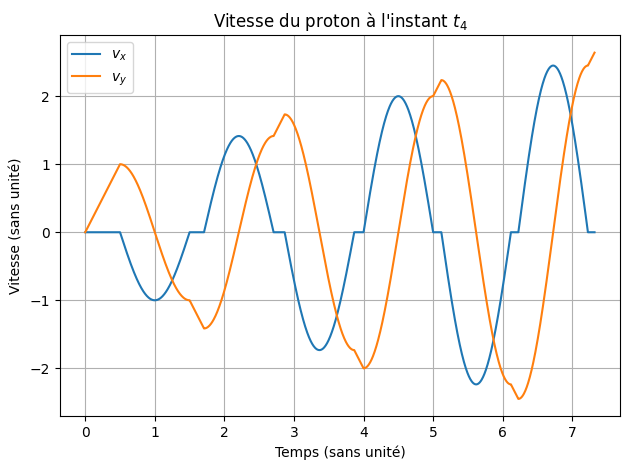

In [87]:
t_0_ech, v_0_x, v_0_y = calc_v_in_E(t_list, 0)
v_x_list = list(v_0_x)
v_y_list = list(v_0_y)
t_ech_list = list(t_0_ech)
for n in range(1,7):
    t_n_ech, v_n_x, v_n_y = calc_v_in_D(t_list, n)
    t_ech_list += list(t_n_ech)
    v_x_list+= list(v_n_x)
    v_y_list+= list(v_n_y)
    t_n_ech, v_n_x, v_n_y = calc_v_in_E(t_list, n)
    t_ech_list+= list(t_n_ech)
    v_x_list+= list(v_n_x)
    v_y_list+= list(v_n_y)
plt.plot(t_ech_list, v_x_list, label=r"$v_x$")
plt.plot(t_ech_list, v_y_list, label=r"$v_y$")
plt.xlabel("Temps (sans unité)")
plt.ylabel("Vitesse (sans unité)")
plt.title(r"Vitesse du proton à l'instant $t_4$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Les courbes de $v_x$ et $v_y$ sont bien continue, et on remarque que plus le temps passe plus l'intensité de la vitesse est élevé

7. Représenter le module de la vitesse $\sqrt{v_x^2+v_y^2}$ en fonction de $t$ pour $t$ variant de $0$ à $t_6$. On utilisera une couleur unique pour la courbe par morceaux. Commenter. A quoi sert un cyclotron ?

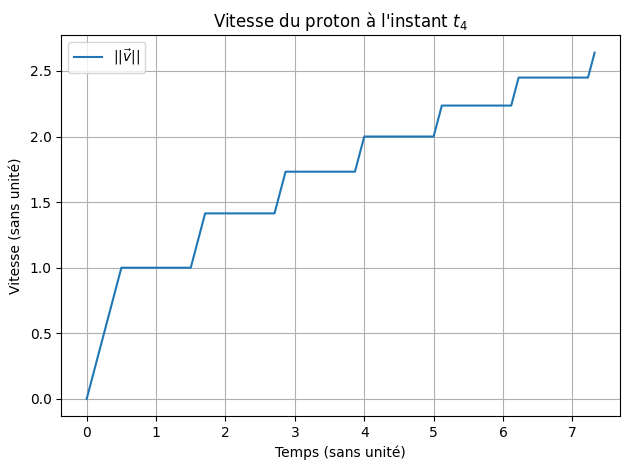

In [88]:
v = np.sqrt(np.array(v_x_list)**2 + np.array(v_y_list)**2)
plt.plot(t_ech_list, v, label=r"$||\vec{v}||$")
plt.xlabel("Temps (sans unité)")
plt.ylabel("Vitesse (sans unité)")
plt.title(r"Vitesse du proton à l'instant $t_4$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

On bien le proton qui accélère au cours du temps et uniquement de manière linéaire par morceaux

8. Pour $n$ variant de $0$ à $50$, représenter le module de la vitesse $\sqrt{v_x(t_n)^2+v_y(t_n)^2}$ en fonction de $t_n-n$, qui est le temps total passé par le proton entre les D à l'instant $t_n$. Commenter.

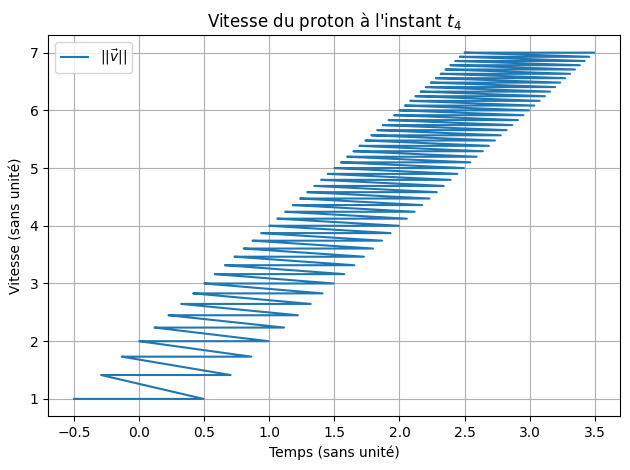

In [93]:
t_list = np.zeros(51)
t_list[0] = 0
for i in range(1, len(t_list)):
    t_list[i] = i + tau * np.sqrt(i) - i
t_0_ech, v_0_x, v_0_y = calc_v_in_E(t_list, 0)
v_x_list = list(v_0_x)
v_y_list = list(v_0_y)
t_ech_list = list(t_0_ech)
for n in range(1,50):
    t_n_ech, v_n_x, v_n_y = calc_v_in_D(t_list, n)
    t_ech_list += list(t_n_ech)
    v_x_list+= list(v_n_x)
    v_y_list+= list(v_n_y)
    t_n_ech, v_n_x, v_n_y = calc_v_in_E(t_list, n)
    t_ech_list+= list(t_n_ech)
    v_x_list+= list(v_n_x)
    v_y_list+= list(v_n_y)
    
v = np.sqrt(np.array(v_x_list)**2 + np.array(v_y_list)**2)
plt.plot(t_ech_list, v, label=r"$||\vec{v}||$")
plt.xlabel("Temps (sans unité)")
plt.ylabel("Vitesse (sans unité)")
plt.title(r"Vitesse du proton à l'instant $t_4$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Ce graphe est très probablement faux. Je m'attendais à v qui monte par pallier